<a href="https://colab.research.google.com/github/EnzoM5/store_data/blob/main/marketplace_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers_df = pd.read_csv('https://raw.githubusercontent.com/EnzoM5/arquivos_csv/main/olist_customers_dataset.csv?token=GHSAT0AAAAAACPPEYL5JIALLEZSFVVBV4IMZQPAAIQ')
order_items_df = pd.read_csv('https://raw.githubusercontent.com/EnzoM5/arquivos_csv/main/olist_order_items_dataset.csv?token=GHSAT0AAAAAACPPEYL5AO2YDDITHJ6HOTUGZQPABMQ')
order_payments_df = pd.read_csv('https://raw.githubusercontent.com/EnzoM5/arquivos_csv/main/olist_order_payments_dataset.csv?token=GHSAT0AAAAAACPPEYL4WIAJYC32252Z44B6ZQPABWQ')
order_reviews_df = pd.read_csv('https://raw.githubusercontent.com/EnzoM5/arquivos_csv/main/olist_order_reviews_dataset.csv?token=GHSAT0AAAAAACPPEYL4SU7X3BYVGQNGYFYEZQPACGA')
orders_df = pd.read_csv('https://raw.githubusercontent.com/EnzoM5/arquivos_csv/main/olist_orders_dataset.csv?token=GHSAT0AAAAAACPPEYL54OEHQ75SWJQ3Q37AZQPACOA')
products_df = pd.read_csv('https://raw.githubusercontent.com/EnzoM5/arquivos_csv/main/olist_products_dataset.csv?token=GHSAT0AAAAAACPPEYL4SLWWC4E5JHZE77EQZQPAC5A')
sellers_df = pd.read_csv('https://raw.githubusercontent.com/EnzoM5/arquivos_csv/main/olist_sellers_dataset.csv?token=GHSAT0AAAAAACPPEYL5VTWWAUVRRICJDFLAZQPADKQ')
product_category_name_translation_df = pd.read_csv('https://raw.githubusercontent.com/EnzoM5/arquivos_csv/main/product_category_name_translation.csv?token=GHSAT0AAAAAACPPEYL4COTO5BFLEZAQJD5EZQPADSA')

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df.dtypes

<ipython-input-17-c47fb8dd2b98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

Visualizando o percentual de vendedores, por estado, comparado ao total de vendedores:

A rede de lojas tem a grande maioria de seus vendedores em São Paulo, o que sugere uma expansão significativa de mercado nesta cidade, onde também ocorre a maioria das vendas. Os estados com um número mediano de vendedores são: Paraná, Minas Gerais, Santa Catarina, Rio de Janeiro e Rio Grande do Sul. Os demais estados têm uma quantidade baixa de vendedores. Portanto, é essencial adotar medidas protecionistas em São Paulo, onde há uma concentração gigantesca no número de vendas, sendo as lojas deste estado o grande pilar de sustentação da empresa.


Deve-se concentrar recursos de marketing nessa região, além de ter uma logística de transporte e organização das lojas impecável, contratando empresas terceiras especializadas nesses quesitos a fim de garantir o bom funcionamento das unidades. No marketing, deve-se mais especificamente criar um plano de vendas próprio para São Paulo.

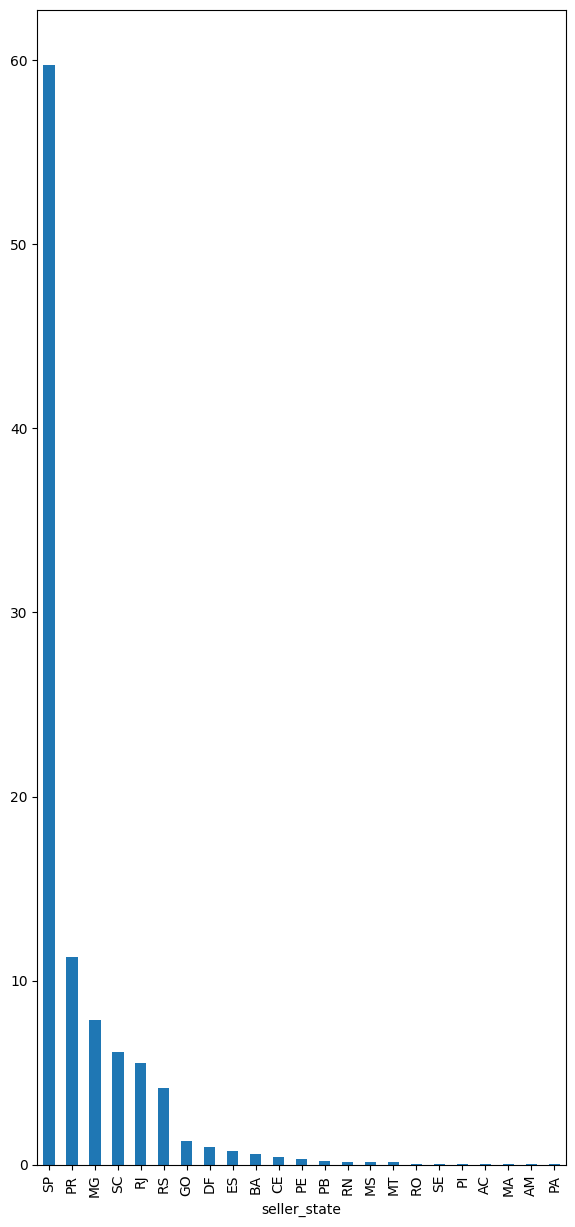

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

count_sellers_state = sellers_df['seller_state'].value_counts() / len(sellers_df) * 100
count_sellers_state.plot.bar(ax=axes[0])

axes[1].remove()

In [ ]:
count_sellers_state

seller_state
SP    59.741519
PR    11.276252
MG     7.883683
SC     6.138934
RJ     5.525040
RS     4.168013
GO     1.292407
DF     0.969305
ES     0.743134
BA     0.613893
CE     0.420032
PE     0.290792
PB     0.193861
RN     0.161551
MS     0.161551
MT     0.129241
RO     0.064620
SE     0.064620
PI     0.032310
AC     0.032310
MA     0.032310
AM     0.032310
PA     0.032310
Name: count, dtype: float64

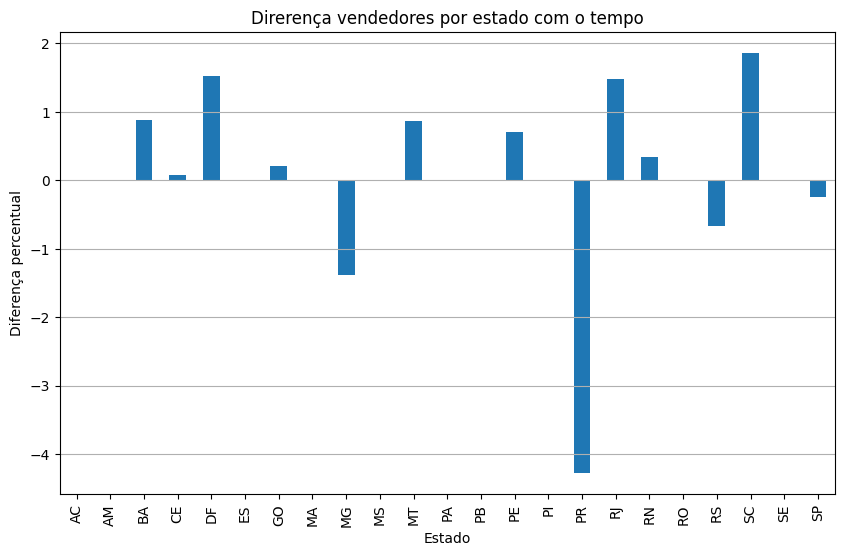

In [ ]:
vendedores_df_futuro = sellers_df.head(200)

contar_vendedores_atuais_por_estado = count_sellers_state.sort_index()

df_atual = pd.DataFrame(contar_vendedores_atuais_por_estado)
df_atual.columns = ['Porcentagem_atual']

contar_vendedores_futuros_por_estado = vendedores_df_futuro['seller_state'].value_counts() / len(vendedores_df_futuro) * 100
contar_vendedores_futuros_por_estado = contar_vendedores_futuros_por_estado.sort_index()
df_futuro = pd.DataFrame(contar_vendedores_futuros_por_estado)
df_futuro.columns = ['Porcentagem_futura']

diferenca_percentual = df_futuro['Porcentagem_futura'] - df_atual['Porcentagem_atual']



plt.figure(figsize=(10, 6))
diferenca_percentual.plot(kind='bar')
plt.title('Direrença vendedores por estado com o tempo')
plt.xlabel('Estado')
plt.ylabel('Diferença percentual')
plt.grid(axis='y')
plt.show()

Visualizando a quantidade de pedidos entregues e cancelados por ano, mes e dia:

Considerando a diminuição da quantidade de pedidos cancelados, o ideal seria continuar o atual processo de acompanhamento ao clientes após a compra, apenas aprimorando o que já está sendo feito. Além disso, deve-se preparar os recursos computacionais, humanos, financeiros e publicitários para os períodos do ano em que vendem mais, considerando o nível de evolução mostrado a cada ano. Com isso, será possível continuar a atender toda a demanda de forma otimizada.

In [ ]:
orders_df_delivered = orders_df[orders_df['order_status'] == 'delivered']
orders_df_canceled = orders_df[orders_df['order_status'] == 'canceled']

In [ ]:
orders_df_delivered.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

[Text(0.5, 0, 'Dia'), Text(0, 0.5, 'Quantidade de Pedidos Entregues')]

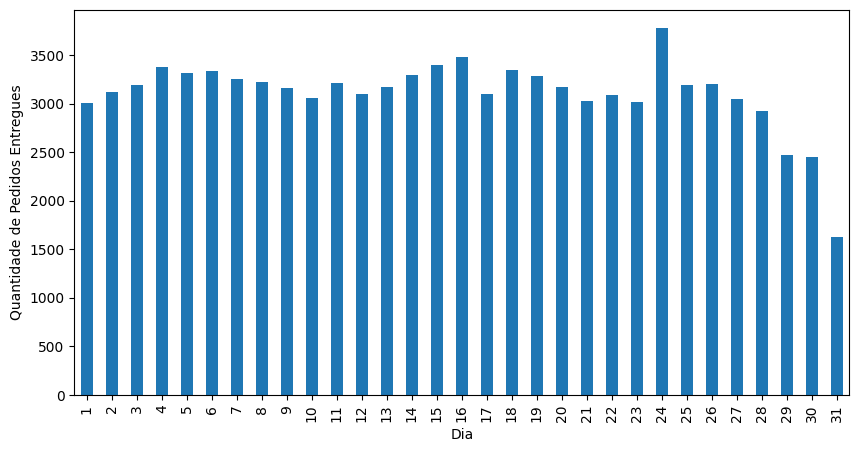

In [ ]:
data = orders_df_delivered.groupby(orders_df['order_purchase_timestamp'].dt.day)['order_id'].count()
ax = data.plot.bar(figsize=(10,5))
ax.set(xlabel='Dia', ylabel='Quantidade de Pedidos Entregues')

[Text(0.5, 0, 'Mês'), Text(0, 0.5, 'Quantidade de Pedidos')]

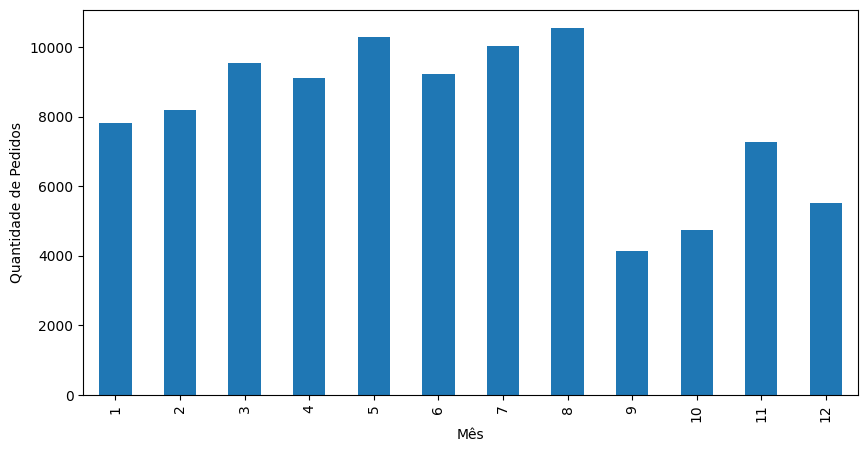

In [ ]:
data = orders_df_delivered.groupby(orders_df_delivered['order_purchase_timestamp'].dt.month)['order_id'].count()
ax = data.plot.bar(figsize=(10,5))
ax.set(xlabel='Mês', ylabel='Quantidade de Pedidos')

[Text(0.5, 0, 'Ano'), Text(0, 0.5, 'Quantidade de Pedidos')]

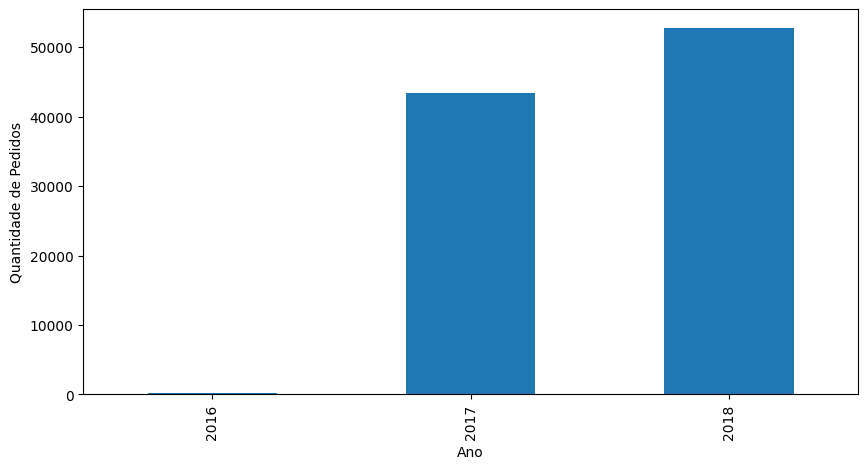

In [ ]:
data = orders_df_delivered.groupby(orders_df_delivered['order_purchase_timestamp'].dt.year)['order_id'].count()
ax = data.plot.bar(figsize=(10,5))
ax.set(xlabel='Ano', ylabel='Quantidade de Pedidos')

[Text(0.5, 0, 'Dia'), Text(0, 0.5, 'Quantidade de Pedidos Cancelados')]

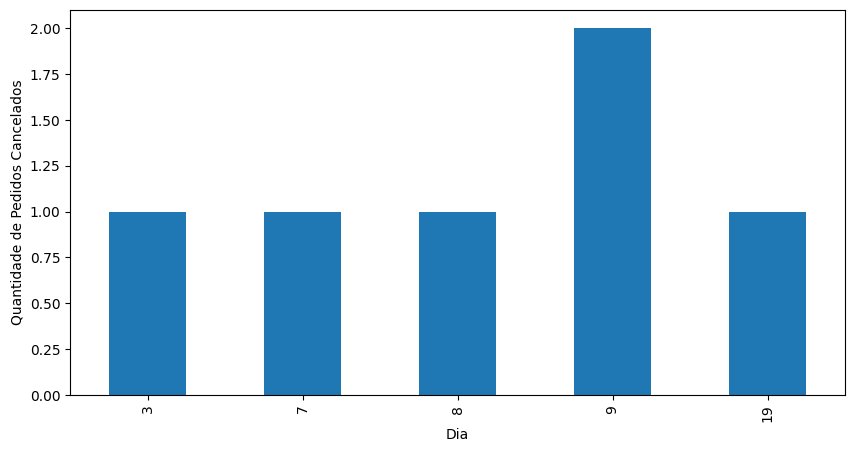

In [ ]:
data = orders_df_canceled.groupby(orders_df['order_purchase_timestamp'].dt.day)['order_id'].count()
ax = data.plot.bar(figsize=(10,5))
ax.set(xlabel='Dia', ylabel='Quantidade de Pedidos Cancelados')

[Text(0.5, 0, 'Mês'), Text(0, 0.5, 'Quantidade de Pedidos Cancelados')]

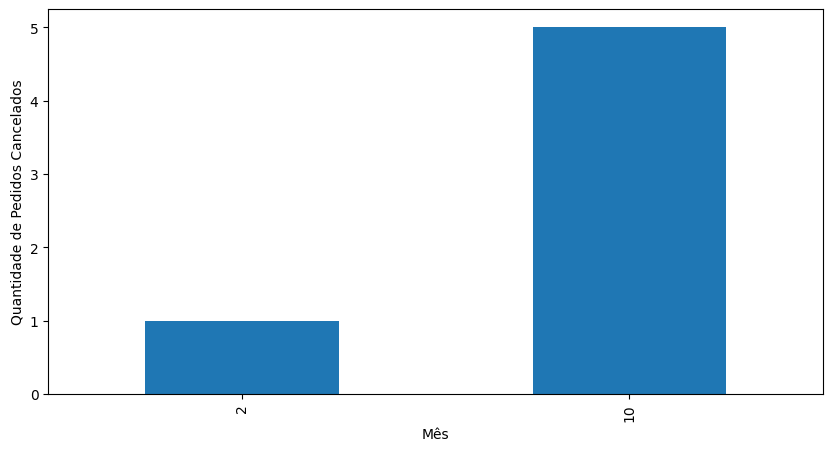

In [ ]:
data = orders_df_canceled.groupby(orders_df_canceled['order_purchase_timestamp'].dt.month)['order_id'].count()
ax = data.plot.bar(figsize=(10,5))
ax.set(xlabel='Mês', ylabel='Quantidade de Pedidos Cancelados')

[Text(0.5, 0, 'Ano'), Text(0, 0.5, 'Quantidade de Pedidos')]

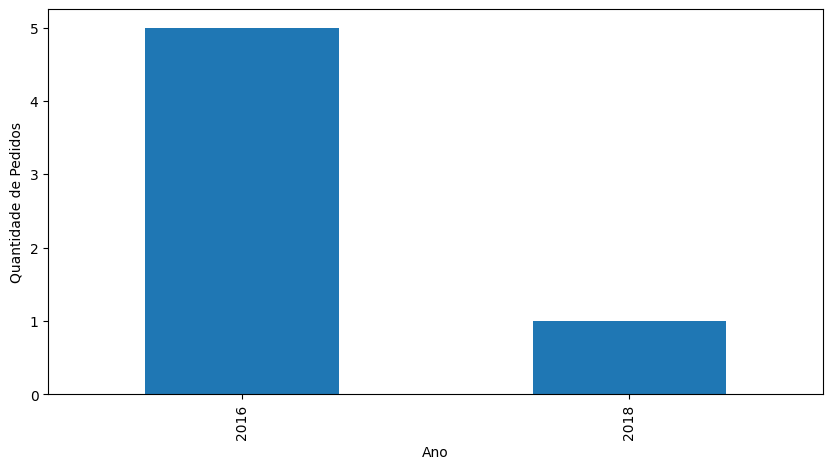

In [ ]:
data = orders_df_canceled.groupby(orders_df_canceled['order_purchase_timestamp'].dt.year)['order_id'].count()
ax = data.plot.bar(figsize=(10,5))
ax.set(xlabel='Ano', ylabel='Quantidade de Pedidos')

Métrica Diferença Percentual Período de Tempo:

In [ ]:
periodo1_inicio = '2018-02-01'
periodo1_fim = '2018-02-28'
periodo2_inicio = '2018-06-01'
periodo2_fim = '2018-06-30'

vendas_periodo1 = orders_df_delivered[(orders_df_delivered['order_purchase_timestamp'] >= periodo1_inicio) &
                                      (orders_df_delivered['order_purchase_timestamp'] <= periodo1_fim)]

vendas_periodo2 = orders_df_delivered[(orders_df_delivered['order_purchase_timestamp'] >= periodo2_inicio) &
                                      (orders_df_delivered['order_purchase_timestamp'] <= periodo2_fim)]


total_vendas_periodo1 = vendas_periodo1.shape[0]
total_vendas_periodo2 = vendas_periodo2.shape[0]

diferenca_percentual = ((total_vendas_periodo2 - total_vendas_periodo1) / total_vendas_periodo1) * 100

print(f'Diferença percentual entre as vendas no período 2 e no período 1: {diferenca_percentual:.2f}%')

Diferença percentual entre as vendas no período 2 e no período 1: -4.46%


Tipos de produtos mais vendidos em cada estado:

Aqui podemos ver os tipos de produtos mais vendidos em cada estado. Com esses dados, podemos adequar as lojas em diferentes localidades com as demandas locais, disponibilizando os tipos de produtos mais populares em maior quantidade e concentrando esforços na promoção destes, levando em conta o tipo de consumidor que os costuma comprar, além de priorizar o abastecimento e boa qualidade dos produtos em questão. Deve-se adequar melhor as lojas para comportar e promover melhor os produtos mais populares em cada região, visando a maximização do lucro.

Além disso, deve-se retirar produtos com números muito baixo de vendas, tendo vendido por volta de 1, 3, 6 unidades e assim por diante, pois eles não pagam o custo que é para tê-los em estoque e não são tão lucrativos quanto outros produtos, sendo mantê-los um esforço desnecessário e prejudicial.

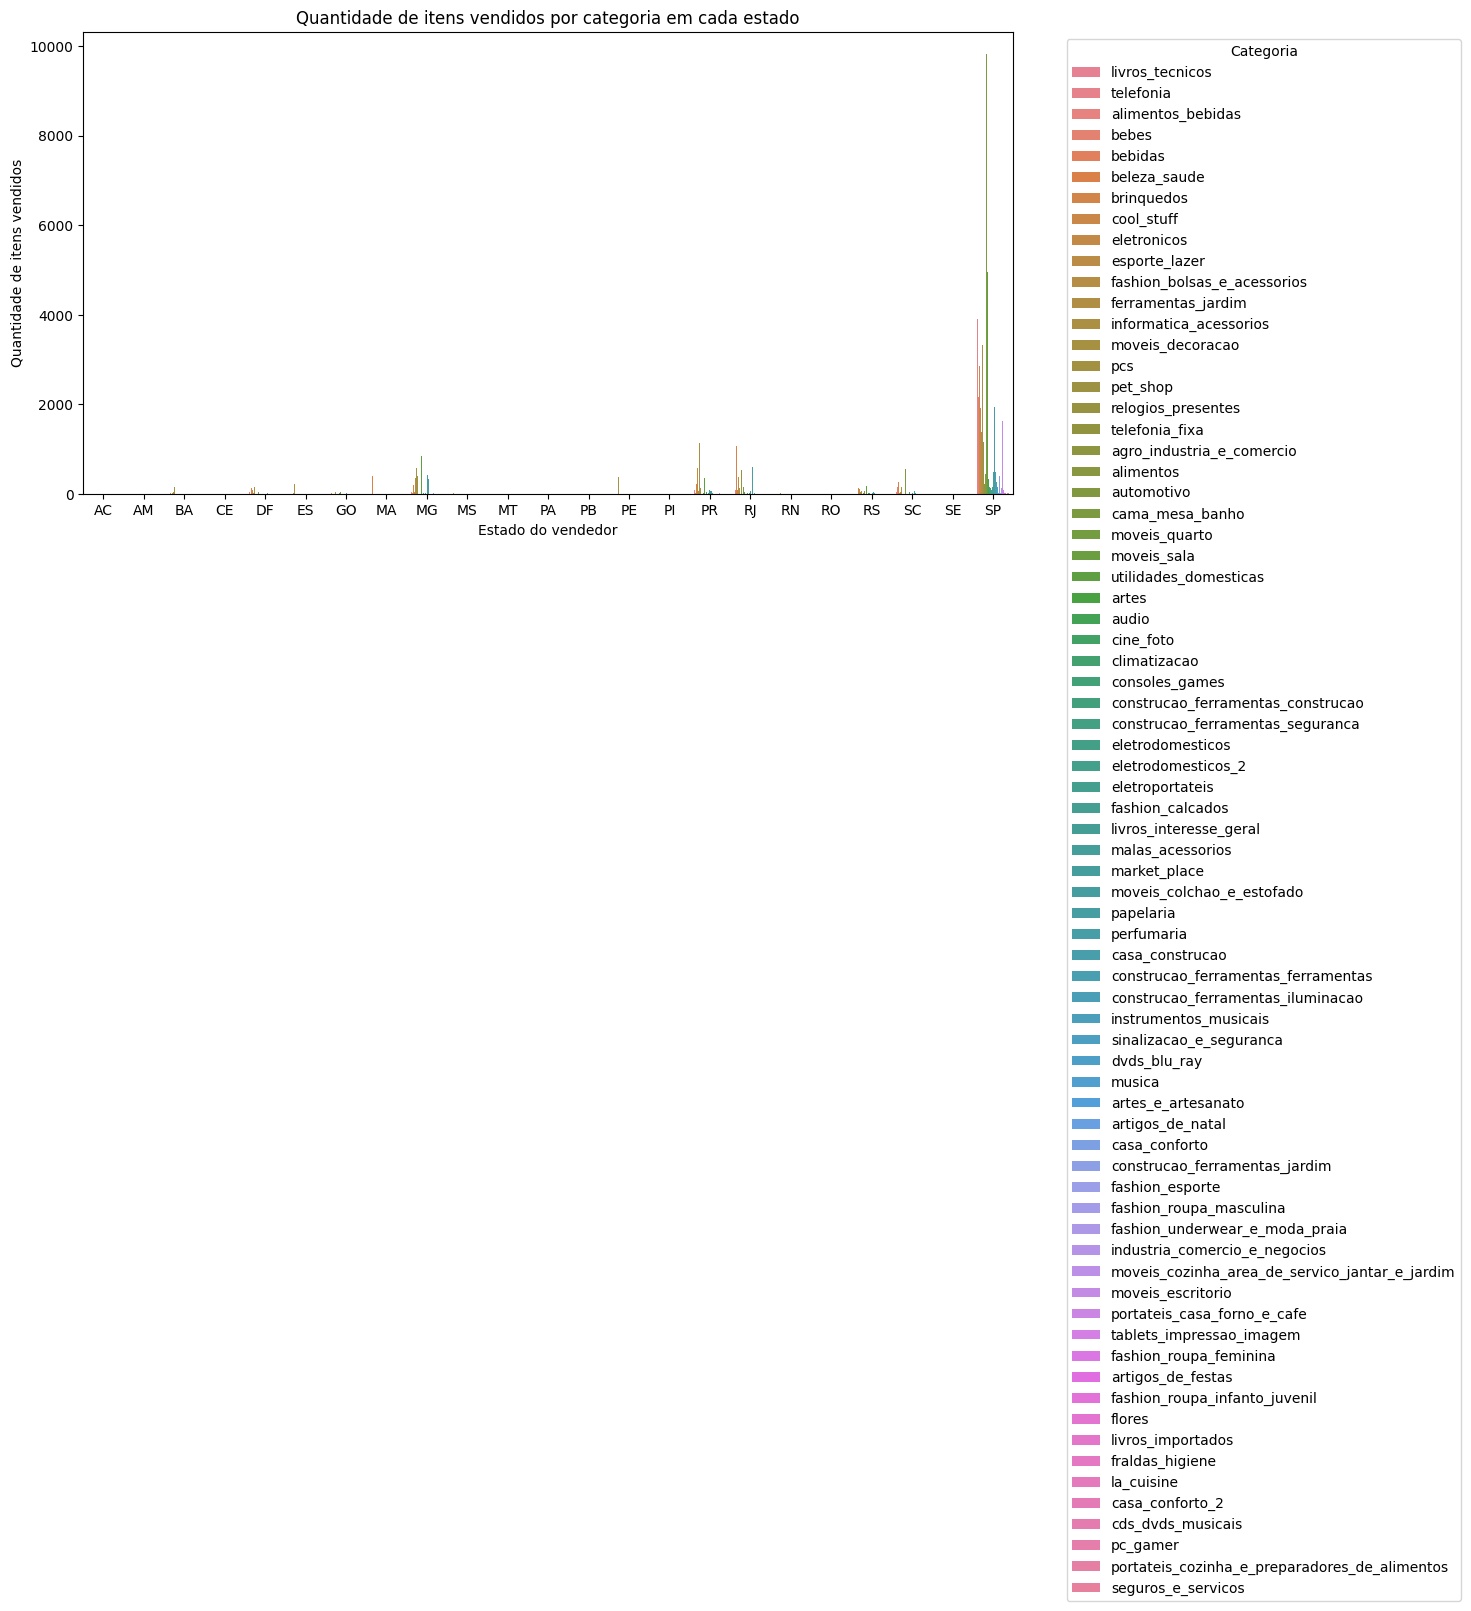

In [ ]:
order_items_merged = pd.merge(order_items_df, products_df, on='product_id')
order_items_merged = pd.merge(order_items_merged, sellers_df, left_on='seller_id', right_on='seller_id')

vendas_categoria_estado = order_items_merged.groupby(['seller_state', 'product_category_name']).size().reset_index(name='total_sales')
#reset_index preserva a estrutura de um dataframe

plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_categoria_estado, x='seller_state', y='total_sales', hue='product_category_name')
plt.title('Quantidade de itens vendidos por categoria em cada estado')
plt.xlabel('Estado do vendedor')
plt.ylabel('Quantidade de itens vendidos')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left') #bbox - organiza os dados na tela
plt.show()

In [ ]:
agrupar_df = vendas_categoria_estado.groupby(['seller_state', 'product_category_name'])['total_sales'].sum()

organizar_df = agrupar_df.reset_index().sort_values(by=['seller_state', 'total_sales'], ascending=False)

tres_tipos_mais_populares_estados = organizar_df.groupby('seller_state').head(3)

tres_tipos_mais_populares_estados

,seller_state,product_category_name,total_sales
443,SP,cama_mesa_banho,9818
441,SP,beleza_saude,6404
484,SP,moveis_decoracao,6256
427,SE,cama_mesa_banho,5
429,SE,informatica_acessorios,4
428,SE,industria_comercio_e_negocios,1
399,SC,esporte_lazer,627
383,SC,cama_mesa_banho,562
426,SC,utilidades_domesticas,351
352,RS,informatica_acessorios,400


In [ ]:
agrupar_df = vendas_categoria_estado.groupby(['seller_state', 'product_category_name'])['total_sales'].sum()

organizar_df = agrupar_df.reset_index().sort_values(by=['seller_state', 'total_sales'], ascending=False)

tres_tipos_menos_populares_estados = organizar_df.groupby('seller_state').tail(3)

tres_tipos_menos_populares_estados

,seller_state,product_category_name,total_sales
467,SP,fashion_roupa_infanto_juvenil,4
497,SP,seguros_e_servicos,2
476,SP,la_cuisine,1
427,SE,cama_mesa_banho,5
429,SE,informatica_acessorios,4
428,SE,industria_comercio_e_negocios,1
377,SC,audio,1
401,SC,fashion_calcados,1
406,SC,fraldas_higiene,1
348,RS,fashion_roupa_feminina,1


Métrica: calcular o numero de categorias vendidas em cada estado

In [ ]:
vendas_categoria_estado = order_items_merged.groupby(['seller_state'])['product_category_name'].nunique().reset_index(name='num_categories')
vendas_categoria_estado

,seller_state,num_categories
0,AC,1
1,AM,1
2,BA,17
3,CE,13
4,DF,36
5,ES,26
6,GO,27
7,MA,1
8,MG,57
9,MS,5


Preço Médio dos Produtos Por Estado:

A partir do preço médio vendido em cada Estado, é possível conhecer melhor o perfil do cliente e seu poder financeiro, possibilitando
direcionar de forma mais adequada os produtos aos seus consumidores em cada região. Por exemplo, nas localidades cujas vendas são, em média,
mais baratas, faria mais passar uma ideia de loja atacadista ou algo semelhante, buscando atingir a população com menor poder aquisitivo,
visando objetividade e disponibilidade de produtos. Já para as localidades de vendas mais caras, faria mais sentido promover os produtos mais caros através do marketing, vender como uma experiência ao invés de vender apenas o produto.

Text(95.72222222222221, 0.5, 'Estado')

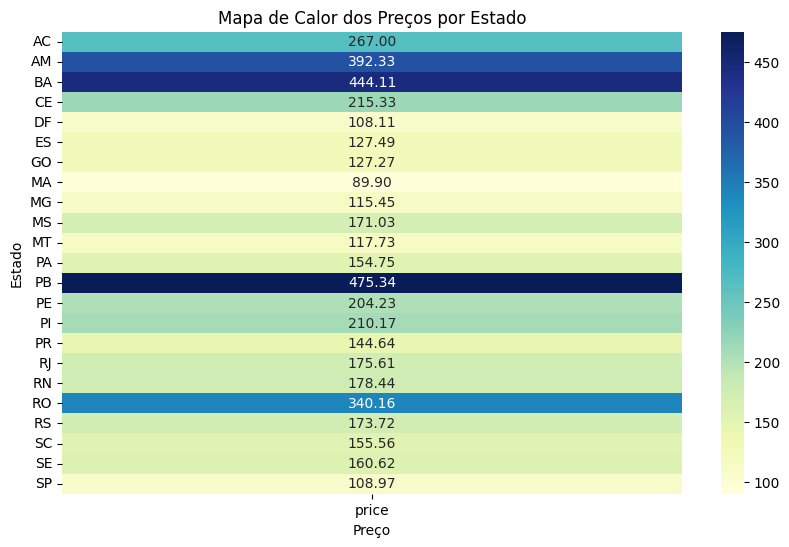

In [ ]:
preco_medio = order_items_merged.groupby('seller_state')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.heatmap(pd.pivot_table(preco_medio, values='price', index='seller_state', aggfunc='mean'),
            cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Mapa de Calor dos Preços por Estado')
plt.xlabel('Preço')
plt.ylabel('Estado')

Métrica de calculo diferença porcentagem do preço médio em uma região depois de um período de tempo:

In [ ]:
preco_medio_novo = 600
df_estado = preco_medio.loc[preco_medio['seller_state'] == 'PB',['seller_state', 'price']]
preco_medio_estado = df_estado['price']
diferenca_preco_medio = (preco_medio_novo - preco_medio_estado) / preco_medio_estado * 100
diferenca_preco_medio

12    26.224604
Name: price, dtype: float64